In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_generator(m, var):
    temp = np.sum(np.random.uniform(0,1,12))-6
    return m + temp*np.sqrt(var)

In [3]:
def get_input():
    N = int(input("Number of data points: "))
    mx1 = float(input("mx1: "))
    vx1 = float(input("vx1: ")) 
    my1 = float(input("my1: "))
    vy1 = float(input("vy1: ")) 
    mx2 = float(input("mx2: "))
    vx2 = float(input("vx2: ")) 
    my2 = float(input("my2: "))
    vy2 = float(input("vy2: ")) 
    return N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2

In [31]:
N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2 = get_input()

Number of data points: 50
mx1: 1
vx1: 2
my1: 1
vy1: 2
mx2: 3
vx2: 4
my2: 3
vy2: 4


In [105]:
D1 = []
D2 = []
for i in range(N):
    D1.append([gaussian_generator(mx1,vx1),gaussian_generator(my1,vy1),1])
    D2.append([gaussian_generator(mx2,vx2),gaussian_generator(my2,vy2),1])
D1 = np.array(D1)
D2 = np.array(D2)
X = np.concatenate((D1,D2),axis=0)
label = np.append(np.array([0 for i in range(N)]),np.array([1 for i in range(N)]))

In [112]:
X_transpose = np.transpose(X)

In [124]:
w_transpose = np.array([100,0,0])
while(1):
    w_new = w_transpose - 0.001*np.dot(X_transpose,1/(1+np.exp(-np.dot(w_transpose,X_transpose)))-label)
    if(np.linalg.norm(w_new-w_transpose)<0.0001):
        break
    w_transpose = w_new
    print(w_new)

[ 9.99114805e+01 -6.83042200e-03 -2.49843276e-02]
[ 9.98229611e+01 -1.36605552e-02 -4.99681455e-02]
[ 9.97344416e+01 -2.04903904e-02 -7.49514376e-02]
[ 9.96459222e+01 -2.73199180e-02 -9.99341868e-02]
[ 9.95574028e+01 -3.41491282e-02 -1.24916376e-01]
[ 9.94688835e+01 -4.09780110e-02 -1.49897988e-01]
[ 9.93803641e+01 -4.78065559e-02 -1.74879003e-01]
[ 9.92918448e+01 -5.46347523e-02 -1.99859403e-01]
[ 9.92033255e+01 -6.14625890e-02 -2.24839168e-01]
[ 9.91148063e+01 -6.82900546e-02 -2.49818279e-01]
[ 9.90262871e+01 -7.51171375e-02 -2.74796714e-01]
[ 9.89377679e+01 -8.19438256e-02 -2.99774452e-01]
[ 9.88492487e+01 -8.87701064e-02 -3.24751472e-01]
[ 9.87607295e+01 -9.55959670e-02 -3.49727750e-01]
[98.67221043 -0.10242139 -0.37470326]
[98.58369136 -0.10924637 -0.39967799]
[98.49517231 -0.11607089 -0.4246519 ]
[98.4066533  -0.12289494 -0.44962497]
[98.31813433 -0.12971849 -0.47459718]
[98.22961539 -0.13654154 -0.4995685 ]
[98.1410965  -0.14336407 -0.52453889]
[98.05257764 -0.15018606 -0.549508

[ 55.13682008  -3.25093335 -12.294777  ]
[ 55.04841961  -3.25659151 -12.31861989]
[ 54.96002671  -3.26217969 -12.34244966]
[ 54.87164202  -3.26769201 -12.36626526]
[ 54.78326616  -3.27312239 -12.39006563]
[ 54.69489978  -3.27846463 -12.41384968]
[ 54.60654356  -3.28371245 -12.43761631]
[ 54.51819814  -3.28885957 -12.4613644 ]
[ 54.42986418  -3.29389978 -12.48509286]
[ 54.34154232  -3.29882705 -12.50880061]
[ 54.25323317  -3.30363559 -12.53248661]
[ 54.16493731  -3.30831998 -12.55614988]
[ 54.07665528  -3.31287521 -12.57978951]
[ 53.98838756  -3.31729683 -12.60340466]
[ 53.90013457  -3.32158096 -12.62699462]
[ 53.81189666  -3.32572441 -12.65055874]
[ 53.72367412  -3.3297247  -12.67409652]
[ 53.63546716  -3.33358013 -12.69760757]
[ 53.54727589  -3.33728974 -12.72109163]
[ 53.45910038  -3.34085339 -12.74454856]
[ 53.37094059  -3.34427166 -12.76797833]
[ 53.28279643  -3.3475459  -12.79138106]
[ 53.19466772  -3.35067813 -12.81475695]
[ 53.10655424  -3.35367101 -12.8381063 ]
[ 53.01845569  -

[ 22.29109417  -2.7633502  -19.53078633]
[ 22.20946276  -2.75653745 -19.54344046]
[ 22.12786763  -2.74971158 -19.55605506]
[ 22.04630903  -2.74287278 -19.56863004]
[ 21.96478728  -2.73602095 -19.5811653 ]
[ 21.88330281  -2.72915567 -19.59366067]
[ 21.80185609  -2.72227622 -19.60611594]
[ 21.72044774  -2.71538155 -19.61853083]
[ 21.63907842  -2.70847034 -19.63090505]
[ 21.55774892  -2.70154091 -19.6432382 ]
[ 21.47646014  -2.69459131 -19.65552985]
[ 21.39521304  -2.68761931 -19.66777949]
[ 21.31400871  -2.68062238 -19.67998656]
[ 21.23284836  -2.67359775 -19.6921504 ]
[ 21.15173328  -2.66654241 -19.7042703 ]
[ 21.07066485  -2.65945316 -19.71634549]
[ 20.98964456  -2.65232659 -19.72837509]
[ 20.90867398  -2.64515918 -19.74035821]
[ 20.82775475  -2.63794727 -19.75229386]
[ 20.74688857  -2.63068716 -19.76418101]
[ 20.66607721  -2.62337513 -19.77601859]
[ 20.58532243  -2.61600747 -19.78780548]
[ 20.50462605  -2.60858054 -19.79954057]
[ 20.42398986  -2.60109084 -19.81122272]
[ 20.34341562  -

[  2.82875471   1.48363586 -12.83056937]
[  2.82417803   1.48123377 -12.80982771]
[  2.81960286   1.47883089 -12.78908676]
[  2.81502916   1.47642726 -12.76834651]
[  2.81045688   1.47402289 -12.747607  ]
[  2.80588599   1.47161781 -12.72686821]
[  2.80131644   1.46921202 -12.70613018]
[  2.7967482    1.46680556 -12.68539291]
[  2.79218124   1.46439844 -12.6646564 ]
[  2.78761551   1.46199067 -12.64392068]
[  2.78305099   1.45958228 -12.62318576]
[  2.77848763   1.45717327 -12.60245163]
[  2.77392542   1.45476368 -12.58171832]
[  2.76936432   1.4523535  -12.56098584]
[  2.76480429   1.44994276 -12.54025419]
[  2.76024531   1.44753148 -12.51952339]
[  2.75568736   1.44511966 -12.49879345]
[  2.7511304    1.44270731 -12.47806437]
[  2.74657441   1.44029446 -12.45733617]
[  2.74201937   1.43788112 -12.43660886]
[  2.73746524   1.43546729 -12.41588244]
[  2.73291201   1.43305299 -12.39515693]
[  2.72835966   1.43063823 -12.37443233]
[  2.72380816   1.42822302 -12.35370866]
[  2.71925749   

[ 0.53512876  0.26463684 -2.28200736]
[ 0.53252484  0.26342174 -2.26896518]
[ 0.529936    0.2622142  -2.25598447]
[ 0.52736226  0.26101421 -2.24306548]
[ 0.52480368  0.25982176 -2.23020847]
[ 0.52226027  0.25863685 -2.21741368]
[ 0.51973208  0.25745948 -2.20468137]
[ 0.51721912  0.25628964 -2.19201176]
[ 0.51472144  0.25512732 -2.1794051 ]
[ 0.51223906  0.25397251 -2.16686161]
[ 0.50977201  0.25282522 -2.15438153]
[ 0.5073203   0.25168543 -2.14196507]
[ 0.50488397  0.25055313 -2.12961245]
[ 0.50246303  0.24942832 -2.11732388]
[ 0.5000575   0.24831099 -2.10509957]
[ 0.49766741  0.24720112 -2.09293971]
[ 0.49529277  0.24609872 -2.08084451]
[ 0.49293359  0.24500376 -2.06881414]
[ 0.49058989  0.24391624 -2.05684881]
[ 0.48826167  0.24283615 -2.04494867]
[ 0.48594896  0.24176348 -2.03311391]
[ 0.48365176  0.24069821 -2.0213447 ]
[ 0.48137007  0.23964034 -2.0096412 ]
[ 0.47910391  0.23858985 -1.99800355]
[ 0.47685327  0.23754673 -1.98643192]
[ 0.47461816  0.23651096 -1.97492644]
[ 0.47239858

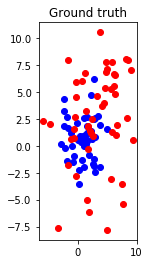

In [106]:
plt.subplot(131)
plt.title("Ground truth")
plt.plot(D1[:,0],D1[:,1],'bo')
plt.plot(D2[:,0],D2[:,1],'ro')

In [48]:
len(label)

100

In [107]:
X

array([[ 1.52650681,  2.64795864,  1.        ],
       [ 2.75285786, -1.22366637,  1.        ],
       [-2.31095241,  3.24212605,  1.        ],
       [ 1.33149368,  0.18047003,  1.        ],
       [ 0.1510123 , -2.22666212,  1.        ],
       [-1.79494707,  2.72874705,  1.        ],
       [ 2.66599282,  6.24514971,  1.        ],
       [ 1.32761782,  1.13506719,  1.        ],
       [-1.95891997, -1.41738042,  1.        ],
       [-2.21415384, -0.16033675,  1.        ],
       [ 2.39933787,  0.67736924,  1.        ],
       [-2.31962148,  4.32937294,  1.        ],
       [ 1.71611523,  1.31852316,  1.        ],
       [ 0.3630511 ,  0.59490312,  1.        ],
       [ 0.79798017,  0.65347043,  1.        ],
       [ 0.50729097,  0.80647368,  1.        ],
       [-2.30458116,  1.88435671,  1.        ],
       [ 2.9428757 ,  0.87252331,  1.        ],
       [ 2.16638341,  1.37092768,  1.        ],
       [-1.17409141,  1.24015029,  1.        ],
       [ 0.0414008 ,  0.56672164,  1.   

In [67]:
2**np.array([1,2,3])

array([2, 4, 8])

In [70]:
np.exp(-4.41742383)

0.012065274480727734